In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

Mounted at /content/drive


In [ ]:
# Dataset paths
base_path = '/content/drive/MyDrive/Sem 6/Machine Learning/MLData'
train_path = base_path + '/train'
val_path = base_path + '/val'
test_path = base_path + '/test'

# Image parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
NUM_CLASSES = 4
EPOCHS = 10

# Class labels (matched to folder order: COVID19, NORMAL, PNEUMONIA, TUBERCULOSIS)
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS']

In [ ]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation and test
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=class_names,
    color_mode='grayscale'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=class_names,
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=class_names,
    color_mode='grayscale',
    shuffle=False
)

Found 4998 images belonging to 4 classes.
Found 1155 images belonging to 4 classes.
Found 979 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.layers import BatchNormalization

def create_cnn_model():
    model = Sequential([
        # Input layer: Grayscale images (224, 224, 1)
        # Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        # Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        # Block 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        # Flatten
        Flatten(),
        # Fully Connected Block 1
        Dense(1024, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        # Fully Connected Block 2
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        # Output Layer: 4 classes
        Dense(NUM_CLASSES, activation='softmax')
    ])
    return model


Training with SGD...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 3980s 25s/step - accuracy: 0.5371 - loss: 1.6300 - val_accuracy: 0.3524 - val_loss: 2.7122
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 87s 553ms/step - accuracy: 0.6077 - loss: 1.4658 - val_accuracy: 0.2684 - val_loss: 10.6523
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 88s 557ms/step - accuracy: 0.6629 - loss: 1.2787 - val_accuracy: 0.7004 - val_loss: 0.7536
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 96s 612ms/step - accuracy: 0.7307 - loss: 0.8802 - val_accuracy: 0.7074 - val_loss: 1.0646
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 546ms/step - accuracy: 0.7474 - loss: 0.8141 - val_accuracy: 0.7299 - val_loss: 0.7139
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 95s 603ms/step - accuracy: 0.7692 - loss: 0.6772 - val_accuracy: 0.6658 - val_loss: 2.9629
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 546ms/step - accuracy: 0.7699 - loss: 0.7171 - val_accuracy: 0.7013 - val_loss: 1.8100
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 95s 604ms/step - accuracy: 0.8057 - loss: 

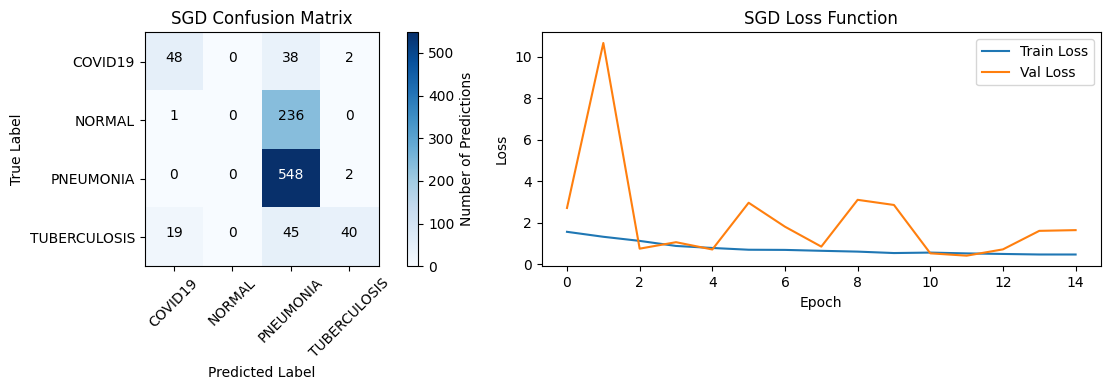

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SGD model saved to /content/drive/MyDrive/Sem 6/Machine Learning/sgd_model.keras


In [ ]:
results = {}

print("\nTraining with SGD...")
model = create_cnn_model()
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    verbose=1
)
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
results['SGD'] = {
    'train_acc': history.history['accuracy'][-1],
    'val_acc': history.history['val_accuracy'][-1],
    'test_acc': test_accuracy,
    'history': history.history
}

# Predict on test set for confusion matrix and metrics
test_generator.reset()
y_pred = model.predict(test_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm = confusion_matrix(y_true, y_pred_classes)

# Visualize confusion matrix as image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('SGD Confusion Matrix')
plt.colorbar(label='Number of Predictions')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()

# Visualize loss function
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('SGD Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Compute and store precision and recall
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
results['SGD']['precision'] = precision
results['SGD']['recall'] = recall

# Save the model
model_path = '/content/drive/MyDrive/Sem 6/Machine Learning/sgd_model.keras'
model.save(model_path)
print(f"SGD model saved to {model_path}")
tf.keras.backend.clear_session()


Training with Adam...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 101s 589ms/step - accuracy: 0.5529 - loss: 1.5125 - val_accuracy: 0.0900 - val_loss: 2.8494
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 96s 610ms/step - accuracy: 0.7445 - loss: 0.7300 - val_accuracy: 0.6632 - val_loss: 1.3413
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 87s 555ms/step - accuracy: 0.7826 - loss: 0.6080 - val_accuracy: 0.6771 - val_loss: 2.1877
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 548ms/step - accuracy: 0.8364 - loss: 0.4431 - val_accuracy: 0.4996 - val_loss: 1.2672
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 87s 551ms/step - accuracy: 0.8303 - loss: 0.4516 - val_accuracy: 0.7186 - val_loss: 0.7561
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 87s 551ms/step - accuracy: 0.8480 - loss: 0.4185 - val_accuracy: 0.2857 - val_loss: 5.9318
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 87s 551ms/step - accuracy: 0.8671 - loss: 0.3513 - val_accuracy: 0.7567 - val_loss: 0.7605
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 88s 559ms/step - accuracy: 0.8723 - loss: 

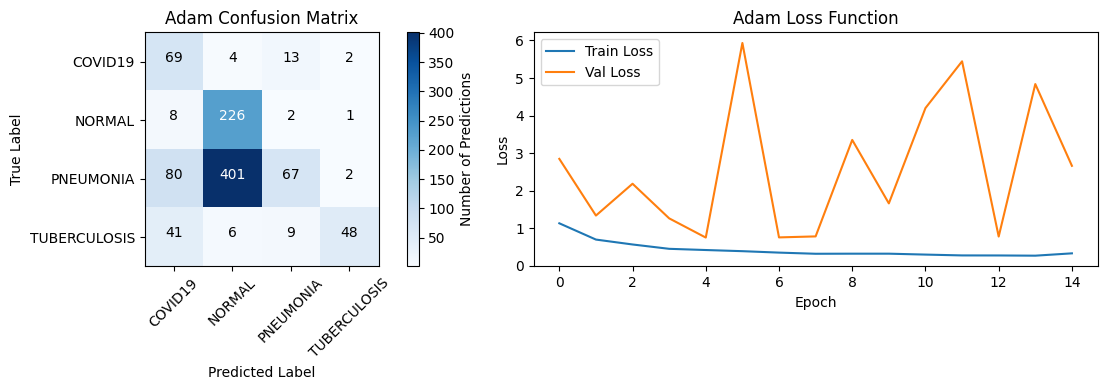

Adam model saved to /content/drive/MyDrive/Sem 6/Machine Learning/adam_model.keras


In [ ]:
print("\nTraining with Adam...")
model = create_cnn_model()
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    verbose=1
)
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
results['Adam'] = {
    'train_acc': history.history['accuracy'][-1],
    'val_acc': history.history['val_accuracy'][-1],
    'test_acc': test_accuracy,
    'history': history.history
}

# Predict on test set for confusion matrix and metrics
test_generator.reset()
y_pred = model.predict(test_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm = confusion_matrix(y_true, y_pred_classes)

# Visualize confusion matrix as image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Adam Confusion Matrix')
plt.colorbar(label='Number of Predictions')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()

# Visualize loss function
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Adam Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Compute and store precision and recall
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
results['Adam']['precision'] = precision
results['Adam']['recall'] = recall

# Save the model
model_path = '/content/drive/MyDrive/Sem 6/Machine Learning/adam_model.keras'
model.save(model_path)
print(f"Adam model saved to {model_path}")
tf.keras.backend.clear_session()


Training with RMSprop...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.5678 - loss: 1.4844
Epoch 1: val_accuracy improved from -inf to 0.62944, saving model to /content/drive/MyDrive/Sem 6/Machine Learning/best_rmsprop_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 113s 677ms/step - accuracy: 0.5683 - loss: 1.4824 - val_accuracy: 0.6294 - val_loss: 1.8759 - learning_rate: 4.0000e-04
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.7485 - loss: 0.7910
Epoch 2: val_accuracy did not improve from 0.62944
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 573ms/step - accuracy: 0.7486 - loss: 0.7905 - val_accuracy: 0.0918 - val_loss: 3.1574 - learning_rate: 4.0000e-04
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.8013 - loss: 0.6120
Epoch 3: val_accuracy improved from 0.62944 to 0.70563, saving model to /content/drive/MyDrive/Sem 6/Machine Learning/best_rmsprop_model.keras
157/157 ━━━━━━━━━━━━━━━━━━━━ 101s 644ms/step - accuracy: 0.8014 - loss: 0.6119 - val_accuracy: 0.7056 - v

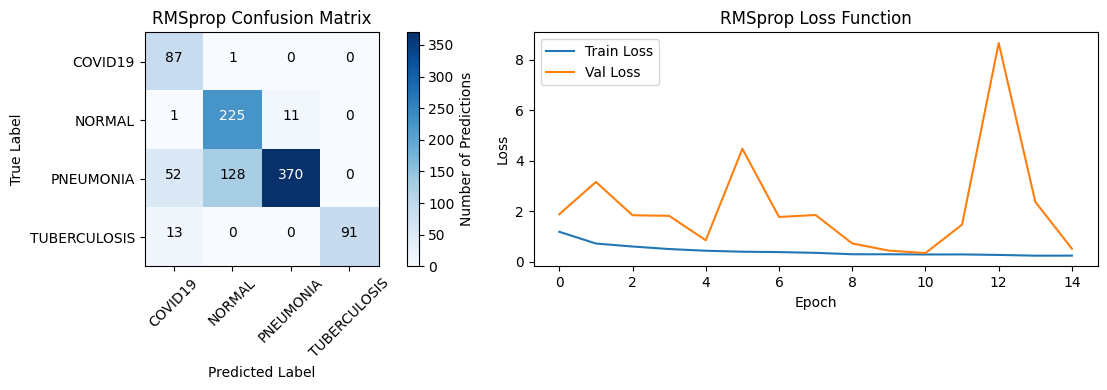

RMSprop model saved to /content/drive/MyDrive/Sem 6/Machine Learning/rmsprop_model.keras


In [ ]:
print("\nTraining with RMSprop...")
model = create_cnn_model()
optimizer = RMSprop(learning_rate=0.0004, rho=0.9, momentum=0.1, epsilon=1e-8, weight_decay=1e-5)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Add learning rate scheduler and model checkpoint
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6
)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/Sem 6/Machine Learning/best_rmsprop_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[lr_scheduler, model_checkpoint],
    verbose=1
)
test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)
results['RMSprop'] = {
    'train_acc': history.history['accuracy'][-1],
    'val_acc': history.history['val_accuracy'][-1],
    'test_acc': test_accuracy,
    'history': history.history
}

# Predict on test set for confusion matrix and metrics
test_generator.reset()
y_pred = model.predict(test_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm = confusion_matrix(y_true, y_pred_classes)

# Visualize confusion matrix as image
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('RMSprop Confusion Matrix')
plt.colorbar(label='Number of Predictions')
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()

# Visualize loss function
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('RMSprop Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Compute and store precision and recall
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
results['RMSprop']['precision'] = precision
results['RMSprop']['recall'] = recall

# Save the final model
model_path = '/content/drive/MyDrive/Sem 6/Machine Learning/rmsprop_model.keras'
model.save(model_path)
print(f"RMSprop model saved to {model_path}")
tf.keras.backend.clear_session()

In [ ]:
# Print accuracy results
print("\nAccuracy Results:")
print(f"{'Optimizer':<10} {'Train Acc':<12} {'Val Acc':<12} {'Test Acc':<12} {'Precision':<12} {'Recall':<12}")
print("-" * 72)
for opt_name in ['SGD', 'Adam', 'RMSprop']:
    result = results.get(opt_name, {})
    print(f"{opt_name:<10} {result.get('train_acc', 0)*100:.2f}%    {result.get('val_acc', 0)*100:.2f}%    {result.get('test_acc', 0)*100:.2f}%    {result.get('precision', 0)*100:.2f}%    {result.get('recall', 0)*100:.2f}%")


Accuracy Results:
Optimizer  Train Acc    Val Acc      Test Acc     Precision    Recall      
------------------------------------------------------------------------
SGD        83.01%    69.09%    64.96%    51.51%    64.96%
Adam       87.47%    38.96%    41.88%    62.71%    41.88%
RMSprop    91.76%    79.57%    78.96%    85.68%    78.96%


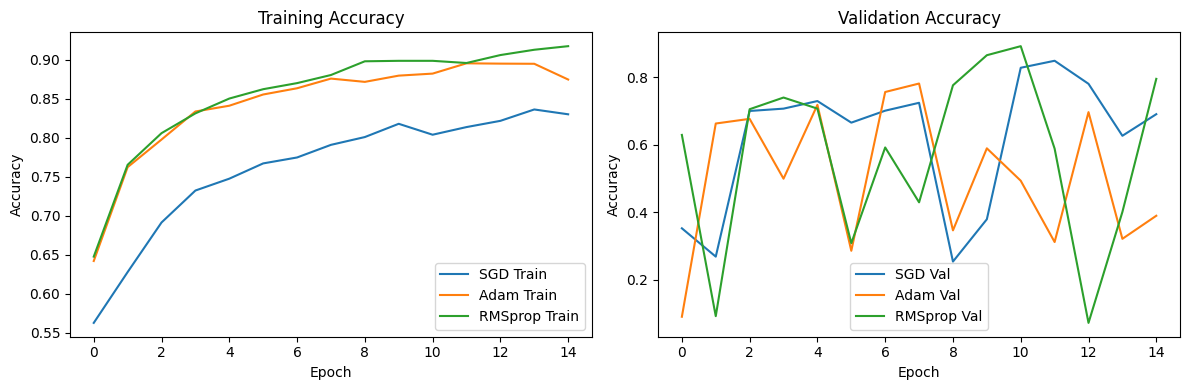

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training accuracy
plt.subplot(1, 2, 1)
for opt_name, result in results.items():
    plt.plot(result['history']['accuracy'], label=f'{opt_name} Train')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
for opt_name, result in results.items():
    plt.plot(result['history']['val_accuracy'], label=f'{opt_name} Val')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

RMSprop model loaded successfully.


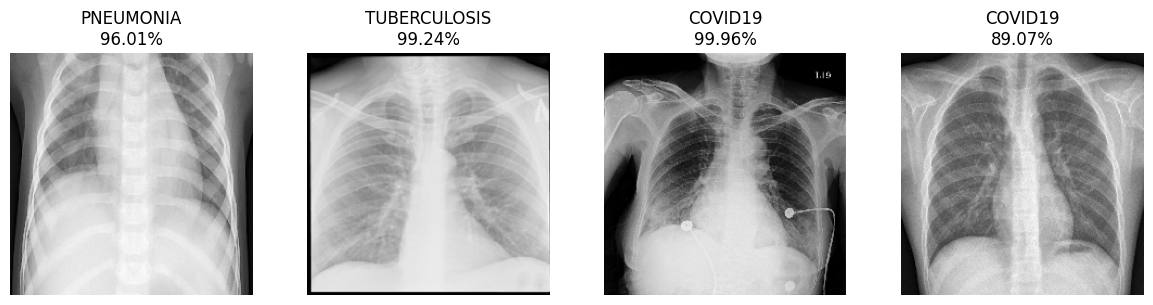

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Path to the saved RMSprop model
model_path = '/content/drive/MyDrive/Sem 6/Machine Learning/rmsprop_model.keras'
IMG_HEIGHT = 224
IMG_WIDTH = 224
# Check if model exists
if not os.path.exists(model_path):
    print(f"Model file {model_path} not found. Please ensure the training cell was run successfully.")
    exit()

# Load the model
model = load_model(model_path)
print("RMSprop model loaded successfully.")

# Define class names (matched to folder order)
class_names = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TUBERCULOSIS']

# Path to folder with images to classify
check_images_path = '/content/drive/MyDrive/Sem 6/Machine Learning/check'

# Check if folder exists
if not os.path.exists(check_images_path):
    print(f"Folder {check_images_path} not found. Please check the path.")
else:
    # Get list of image files
    image_files = [f for f in os.listdir(check_images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("No images found in the check folder.")
    else:
        # Process and display each image
        plt.figure(figsize=(15, 3 * ((len(image_files) + 4) // 5)))  # Adjust height dynamically
        for i, img_file in enumerate(image_files[:10]):  # Limit to 10 images
            # Load and preprocess image
            img_path = os.path.join(check_images_path, img_file)
            img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH), color_mode='grayscale')
            img_array = img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            # Predict class
            predictions = model.predict(img_array, verbose=0)
            predicted_class = class_names[np.argmax(predictions[0])]
            confidence = np.max(predictions[0]) * 100

            # Display image with prediction
            plt.subplot((len(image_files) + 4) // 5, 5, i + 1)
            plt.imshow(img, cmap='gray')
            plt.title(f"{predicted_class}\n{confidence:.2f}%")
            plt.axis('off')

        plt.tight_layout()
        plt.show()